nr of spikes: 0


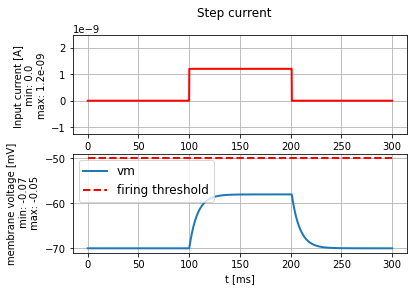

nr of spikes: 5


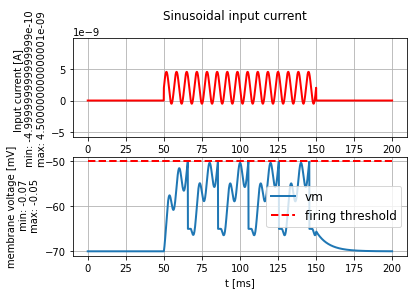

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

In [3]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))
print("firing thhereshold: {}".format(LIF.FIRING_THRESHOLD))
print("Membrande resistance: {}".format(LIF.MEMBRANE_RESISTANCE))

I_min = (LIF.FIRING_THRESHOLD - LIF.V_REST)/LIF.MEMBRANE_RESISTANCE
print("I_min= {}".format(I_min))




resting potential: -0.07
firing thhereshold: -0.05
Membrande resistance: 10000000.0
I_min= 2.0000000000000005e-09


nr of spikes: 3
frequency: 30.0


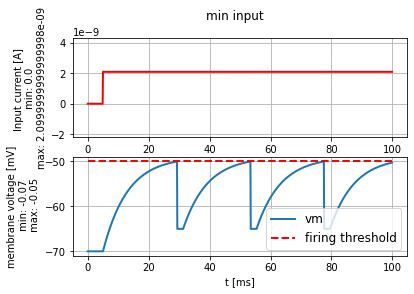

In [50]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=0.0025*b2.uamp)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

print("frequency: {}".format(spike_monitor.count[0]/(100*b2.ms)))

In [53]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
f = []
I = []
for i in range(100):
    step_current = input_factory.get_step_current(
        t_start=5, t_end=100, unit_time=b2.ms,
        amplitude=(0.002+0.0001*i)*b2.uamp)  # set I_min to your value

    # run the LIF model.
    # Note: As we do not specify any model parameters, the simulation runs with the default values
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

    # plot I and vm
    #plot_tools.plot_voltage_and_current_traces(
    #state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
    #print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

    #print("frequency: {}".format(spike_monitor.count[0]/(100*b2.ms)))
    f.append(spike_monitor.count[0]/(100*b2.ms))
    I.append((0.002+0.0005*i)*b2.uamp)

plot_tools.plt(I,f)

TypeError: 'module' object is not callable

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


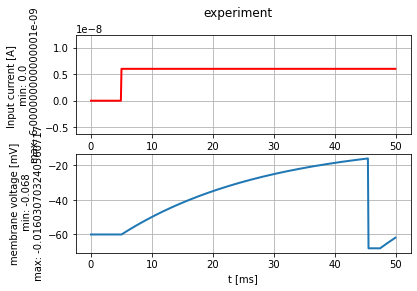

In [65]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms, amplitude= 6 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
u_th = -19
U_rest = -60

LIF.print_obfuscated_parameters(random_parameters)

nr of spikes: 0
<StateMonitor, recording ['v'] from neurongroup_2>


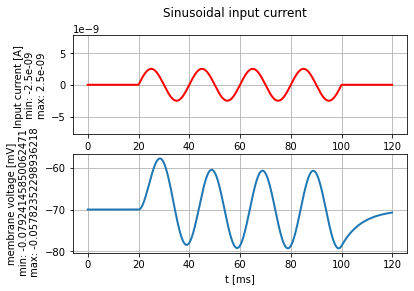

In [79]:
import scipy.signal as sc
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=50*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

#sc.correlate(state_monitor, sinusoidal_current)
print(state_monitor)
print(sinusoidal_current)